# Pymaceuticals Inc.
---

### Analysis

- The purpose of this analysis is to compare the perfomance of a fictitious anti-cancer drug, Capomulin, developed by the fictitious pharmaceutical company, Pymaceuticals, Inc, with other anti-cancer drugs. The below analysis displays the results of a 45 day study that observed and measured squamous cell carcinoma (SCC) tumor size in 249 mice as they received treatment with a range of drug regimens. Specifically, Capomulin, Ceftamin, Infubinol, Naftisol, Propiva, Ramicane, Stelasyn, and Zoniferol. A placebo group was also included in the study.

- The first step of this analysis was data cleaning, where duplicate data entries were removed. 

- Summary statistics were then generated to present measures of central tendency, variance, standard deviation, and SEM of tumor volume for all test groups, including drug regimens and placebo. Ramicane presented the lowest figures while Ketapril presented the largest. 

- Graphical representation of study characteristics were created. This includes bar charts presenting the distribution of mice across test groups, and pie charts illustrating the distribution of male vs. female mice within the study (not within each test group). The bar graph revealed a notably higher number of mice included within the Capomulin and Ramicane test groups as well as a notably lower number of mice included within the Propiva test group. The pie chart releaved a virtually even split between male and female mice within the study, 51% and 49% respectively. Distribution of male and female mice within each test group was not considered in this analysis. Capomulin, Ramicane, Infubinol, and Ceftamin


- Next, a box plot was generated following the calculation of quartile ranges and outliers (using upper and lower bounds) for the following drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. These figures were generated using the final tumor volume of each mouse across the treatment regimens. The only drug regimen with data found to contain a potential outlier was Infubinol. Ramicane's center of distribution (median) was the lowest of the three distributions while Infubinol's was the highest. Capomulin had the most concentrated distribution (IQR of 7.7) and Ceftamin had the least concentrated distribution (IQR of 15).


- Next a line plot was created capturing tumor volume over time for a mouse that received the Capomulin treatment. Only one mouse was considered for one treatment regimen. A scatter plot was also generated to illustrate the relationship between average tumor volume vs. mouse weight for the Capomulin test group. Using linear regression, a line of best fit was added to this scatter plot. The correlation coefficient was calculated to be 0.84, which illustrates a strong, positive correlation between the average tumor volume and mouse weight.


In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left") 
#use pd.merge method to combine csv files by Mouse ID with left join

# Display the data table for preview
data.head()#use head() to preview results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mice = data["Mouse ID"].nunique() #use nunique() to count # of unique Mouse IDs
#show results = 249
num_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(["Mouse ID","Timepoint"])]
duplicates #print out last instance (not first) of each duplicate row
#output shows that Mouse ID with duplicates is g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = data[data["Mouse ID"] == "g989"] 
#above: create df to isolate rows using Mouse ID of duplicate mouse
dup #view results as output
#alternatively, can use .loc like so: data.loc[data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#NOTE: Although there are duplicate rows for Mouse ID, per above output,
#3 rows (with timestamp 25, 30, 35) are unique measurements for the same mouse
#this would indicate that they are not duplicate entries, 
#and I would argue they should not be removed (mice should still be 249)
#I would use: clean_data = data.drop_duplicates()

#Remove duplicate mouse by its ID:
data = data.loc[(data["Mouse ID"] != "g989")]
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
#note, although there are duplicate rows for Mouse ID
mice = data["Mouse ID"].nunique()
mice #print output, which equals 248

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_tv = data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tv = data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tv = data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tv = data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tv = data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": avg_tv,
    "Median Tumor Volume": median_tv,
    "Tumor Volume Variance": variance_tv,
    "Tumor Volume Std. Dev": std_tv,
    "Tumor Volume Std. Err.": sem_tv,
})

#view output
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

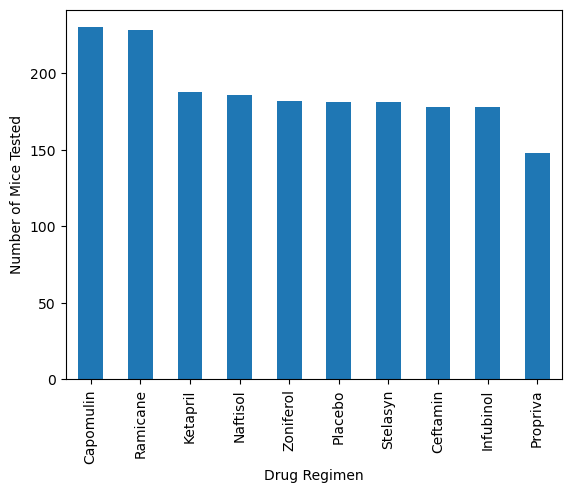

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#x_axis = np.arange(len(data))
#bar_chart = data.plot(kind = "bar", title="Mice Tested")

regimen = data.groupby("Drug Regimen")#group by desired x-axis
mice_timestamps = regimen["Timepoint"].count()#total number of timepoints
#sort values, plot bar chart, and add missing y-axis label
mice_timestamps.sort_values(ascending = False).plot(kind='bar').set_ylabel("Number of Mice Tested")



Text(0, 0.5, 'Number of Mice Tested')

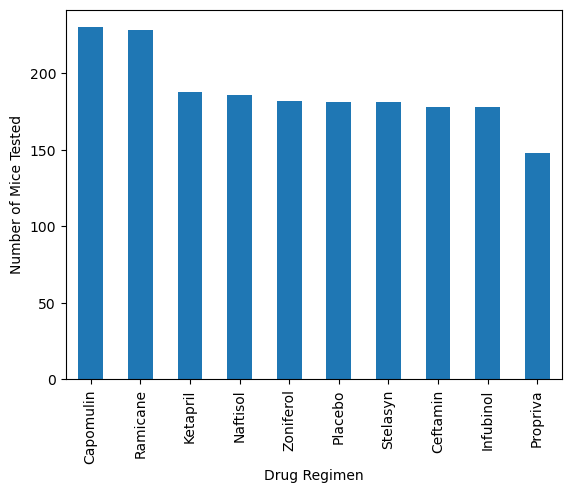

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mts = mice_timestamps.sort_values(ascending = False) #use previous total # timepoints and organize data descending order

mts.plot.bar(y="Timepoint", use_index=True) #pyplot using index of "Drug Regimen"
plt.ylabel("Number of Mice Tested") #add missing y-axis label

Text(0, 0.5, '')

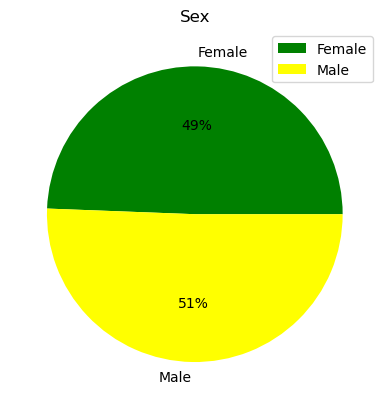

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['green', "yellow"] #changing colors for fun
piechart = data.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', title=("Sex"), autopct='%1.0f%%', colors=colors)#note-autopct adds percents
piechart.set_ylabel("")#removing "Mouse ID"


Text(0.0, 1.0, 'Sex')

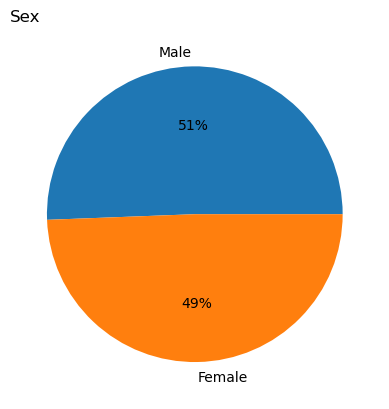

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

g = data.loc[(data["Sex"] == "Male")]
h = pd.Series(g["Sex"])
mle = len(h) #creating variable for number of male mice

i = data.loc[(data["Sex"] == "Female")]
j = pd.Series(i["Sex"])
fmle = len(j) #creating variable for number of female mice

labels = ["Male","Female"]
male_female = [mle,fmle]
male_female

plt.pie(male_female, labels=labels, autopct="%1.0f%%") #plotting pie chart
plt.title("Sex", loc='left')


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = data.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

data2 = data.copy()#Note: I'm first creating a copy of og DF to prevent modifications to the og DF
data3 = pd.merge(last_tp, data2, on=(["Mouse ID","Timepoint"]))
data3


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [314]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tvd = []
   
# Locate the rows which contain mice on each drug and get the tumor volumes
for regs in drug_regs:
    treat = data3.loc[data3["Drug Regimen"] == regs] #drug regimen in row is Capomulin, Ramicane, Infubinol, or Ceftamin
    #note, will iterate through data 1 drug regimen at a time (capomulin then ramicane, etc.)
    tv = treat["Tumor Volume (mm3)"] #grab the associated tumor volume if drug regimen condition is met
    tvd.append(tv) #add associated tumor volume to list per above plotting requirement
    

##CALCULATIONS FOR CAPOMULIN RX REGIMEN DATA
print("**********************************************************************")
print("Results for Identification of Possible Outliers Within Capomulin Data:")
print("**********************************************************************")#separate print results for readability
drug_regs1 = "Capomulin" #specificy drug regimen as Capomulin
tvdcap = [] #create empty list to calc quartiles & lower/upper bounds

#gather data for Capomulin and store in df:
for capreg in drug_regs1: 
    captreat = data3.loc[data3["Drug Regimen"] == "Capomulin"]#set condition for rx regimen = Capomulin
    tvol = captreat["Tumor Volume (mm3)"] #grab the associated tumor volume if drug regimen condition is met
    tvdcap.append(tvol) #add tumor volume data to empty list created prior to for loop
    mid = captreat["Mouse ID"] #grab the associated mouse id if drug regimen condition is met
    tpo = captreat["Timepoint"] #grab the associated last timepoint (using data3 df) if drug regimen condition is met
    
    #create df with above variables
    df14 = pd.DataFrame({
        "Tumor Volume (mm3)": tvol,
        "Mouse ID": mid,
        "Timepoint": tpo})

#Calculate quartiles and upper/lower bounds for final tumor volume for mice treated with Capomulin
quartile_cap = tvdcap[0].quantile([.25,.75])
lowerq_cap = quartile_cap[0.25]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

lower_cap = lowerq_cap - (1.5*iqr_cap)
upper_cap = upperq_cap + (1.5*iqr_cap)
print("")
print(f'The lower quartile of tumor volume for Capomulin is {lowerq_cap} and the uppper quartile is {upperq_cap}. The IQR is {iqr_cap}.')
print("")
print(f'The lower bound of tumor volume for Capomulin is {lower_cap} and the uppper bound is {upper_cap}')

#Identify any possible outliers using upper and lower bounds calculated above
outliers = df14.loc[(df14["Tumor Volume (mm3)"] < lower_cap) | (df14["Tumor Volume (mm3)"] > upper_cap)]    

#Print out identified outliers, otherwise print message stating no outliers were identified 
if outliers.empty == True: #This means the outliers df is empty (no outliers identified)
    print("No outliers were identified for Capomulin")

else:
    print("Possible outliers within the Capomulin rx regimen results are: ") 
    print(outliers)
print("")




##CALCULATIONS FOR RAMICANE RX REGIMEN DATA
print("**********************************************************************")
print("Results for Identification of Possible Outliers Within Ramicane Data:")
print("**********************************************************************")
drug_regs2 = "Ramicane" #specificy drug regimen as Ramicane
tvdreg = [] #create empty list to calc quartiles & lower/upper bounds

#gather data for Capomulin and store in df:
for regreg in drug_regs2: 
    regtreat = data3.loc[data3["Drug Regimen"] == "Ramicane"]#set condition for rx regimen = Ramicane
    tvol1 = regtreat["Tumor Volume (mm3)"] #grab the associated tumor volume if drug regimen condition is met
    tvdreg.append(tvol1) #add tumor volume data to empty list created prior to for loop
    mid1 = regtreat["Mouse ID"] #grab the associated mouse id if drug regimen condition is met
    tpo1 = regtreat["Timepoint"] #grab the associated last timepoint (using data3 df) if drug regimen condition is met
    
    #create df with above variables
    df15 = pd.DataFrame({
        "Tumor Volume (mm3)": tvol1,
        "Mouse ID": mid1,
        "Timepoint": tpo1})

#Calculate quartiles and upper/lower bounds for final tumor volume for mice treated with Ramicane
quartile_reg = tvdreg[0].quantile([.25,.75])
lowerq_reg = quartile_reg[0.25]
upperq_reg = quartile_reg[0.75]
iqr_reg = upperq_reg-lowerq_reg   
lower_reg = lowerq_reg - (1.5*iqr_reg)
upper_reg = upperq_reg + (1.5*iqr_reg)
print("")
print(f'The lower quartile of tumor volume for Ramicane is {lowerq_reg} and the uppper quartile is {upperq_reg}. The IQR is {iqr_reg}.')
print("")
print(f'The lower bound of tumor volume for Ramicane is {lower_reg} and the uppper bound is {upper_reg}')

#Identify any possible outliers using upper and lower bounds calculated above
outliers1 = df15.loc[(df15["Tumor Volume (mm3)"] < lower_reg) | (df15["Tumor Volume (mm3)"] > upper_reg)]    

#Print out identified outliers, otherwise print message stating no outliers were identified 
if outliers1.empty == True: #This means the outliers df is empty (no outliers identified)
    print("No outliers were identified for Ramicane")

else:
    print("Possible outliers within the Ramicane rx regimen results are: ") 
    print(outliers1)

print("")



##CALCULATIONS FOR INFUBINOL RX REGIMEN DATA
print("**********************************************************************")#separate print results for readability
print("Results for Identification of Possible Outliers Within Infubinol Data:")
print("**********************************************************************")
drug_regs3 = "Infubinol" #specificy drug regimen as Infubinol
tvdinf = [] #create empty list to calc quartiles & lower/upper bounds

#gather data for Infubinol and store in df:
for infreg in drug_regs3: 
    inftreat = data3.loc[data3["Drug Regimen"] == "Infubinol"]#set condition for rx regimen = Infubinol
    tvol2 = inftreat["Tumor Volume (mm3)"] #grab the associated tumor volume if drug regimen condition is met
    tvdinf.append(tvol2) #add tumor volume data to empty list created prior to for loop
    mid2 = inftreat["Mouse ID"] #grab the associated mouse id if drug regimen condition is met
    tpo2 = inftreat["Timepoint"] #grab the associated last timepoint (using data3 df) if drug regimen condition is met
    
    #create df with above variables
    df16 = pd.DataFrame({
        "Tumor Volume (mm3)": tvol2,
        "Mouse ID": mid2,
        "Timepoint": tpo2})

#Calculate quartiles and upper/lower bounds for final tumor volume for mice treated with Infubinol
quartile_inf = tvdinf[0].quantile([.25,.75])
lowerq_inf = quartile_inf[0.25]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf   
lower_inf = lowerq_inf - (1.5*iqr_inf)
upper_inf = upperq_inf + (1.5*iqr_inf)
print("")
print(f'The lower quartile of tumor volume for Infubinol is {lowerq_inf} and the uppper quartile is {upperq_inf}. The IQR is {iqr_inf}.')
print("")
print(f'The lower bound of tumor volume for Infubinol is {lower_inf} and the uppper bound is {upper_inf}')

#Identify any possible outliers using upper and lower bounds calculated above
outliers2 = df16.loc[(df16["Tumor Volume (mm3)"] < lower_inf) | (df16["Tumor Volume (mm3)"] > upper_inf)]    

#Print out identified outliers, otherwise print message stating no outliers were identified 
if outliers2.empty == True: #This means the outliers df is empty (no outliers identified)
    print("No outliers were identified for Infubinol")

else:
    print("")
    print("Possible outliers within the Infubinol rx regimen results are: ")  
    print("")
    print(outliers2)

print("")




##CALCULATIONS FOR CEFTAMIN RX REGIMEN DATA
print("**********************************************************************")#separate print results for readability
print("Results for Identification of Possible Outliers Within Ceftamin Data:")
print("**********************************************************************")
drug_regs4 = "Ceftamin" #specificy drug regimen as Ceftamin
tvdcet = [] #create empty list to calc quartiles & lower/upper bounds

#gather data for Ceftamin and store in df:
for cetreg in drug_regs4: 
    cettreat = data3.loc[data3["Drug Regimen"] == "Ceftamin"]#set condition for rx regimen = Ceftamin
    tvol3 = cettreat["Tumor Volume (mm3)"] #grab the associated tumor volume if drug regimen condition is met
    tvdcet.append(tvol3) #add tumor volume data to empty list created prior to for loop
    mid3 = cettreat["Mouse ID"] #grab the associated mouse id if drug regimen condition is met
    tpo3 = cettreat["Timepoint"] #grab the associated last timepoint (using data3 df) if drug regimen condition is met
    
    #create df with above variables
    df17 = pd.DataFrame({
        "Tumor Volume (mm3)": tvol3,
        "Mouse ID": mid3,
        "Timepoint": tpo3})

#Calculate quartiles and upper/lower bounds for final tumor volume for mice treated with Ceftamin
quartile_cet = tvdcet[0].quantile([.25,.75])
lowerq_cet = quartile_cet[0.25]
upperq_cet = quartile_cet[0.75]
iqr_cet = upperq_cet-lowerq_cet   
lower_cet = lowerq_cet - (1.5*iqr_cet)
upper_cet = upperq_cet + (1.5*iqr_cet)
print("")
print(f'The lower quartile of tumor volume for Ceftamin is {lowerq_cet} and the uppper quartile is {upperq_cet}. The IQR is {iqr_cet}.')
print("")
print(f'The lower bound of tumor volume for Ceftamin is {lower_cet} and the uppper bound is {upper_cet}')

#Identify any possible outliers using upper and lower bounds calculated above
outliers3 = df17.loc[(df17["Tumor Volume (mm3)"] < lower_cet) | (df17["Tumor Volume (mm3)"] > upper_cet)]    

#Print out identified outliers, otherwise print message stating no outliers were identified 
if outliers3.empty == True: #This means the outliers df is empty (no outliers identified)
    print("No outliers were identified for Ceftamin")

else:
    print("Possible outliers within the Ceftamin rx regimen results are: ") 
    print(outliers3)

print("")



**********************************************************************
Results for Identification of Possible Outliers Within Capomulin Data:
**********************************************************************

The lower quartile of tumor volume for Capomulin is 32.37735684 and the uppper quartile is 40.1592203. The IQR is 7.781863460000004.

The lower bound of tumor volume for Capomulin is 20.70456164999999 and the uppper bound is 51.83201549
No outliers were identified for Capomulin

**********************************************************************
Results for Identification of Possible Outliers Within Ramicane Data:
**********************************************************************

The lower quartile of tumor volume for Ramicane is 31.56046955 and the uppper quartile is 40.65900627. The IQR is 9.098536719999998.

The lower bound of tumor volume for Ramicane is 17.912664470000003 and the uppper bound is 54.30681135
No outliers were identified for Ramicane

**************

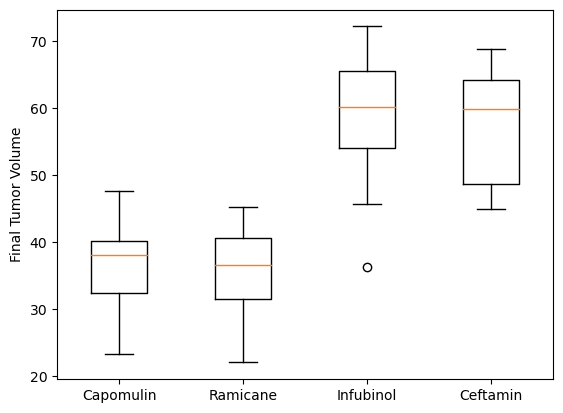

In [194]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figl, axl = plt.subplots()
axl.set_ylabel("Final Tumor Volume")
axl.boxplot(tvd, labels = drug_regs)
plt.show()

## Line and Scatter Plots

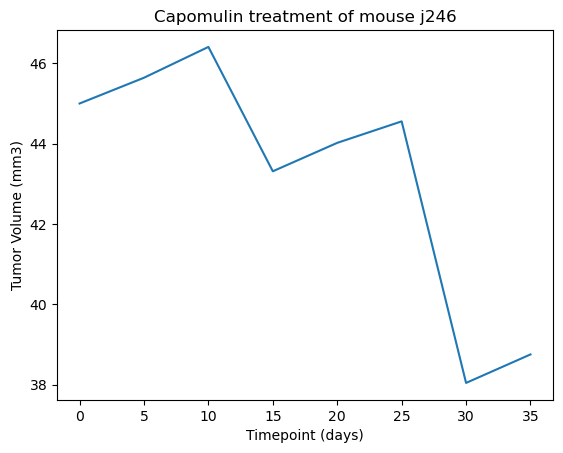

In [247]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_cap = data.loc[(data["Drug Regimen"] == "Capomulin")] #isolate to Capomulin data

data_cap #look at output and select a mouse to analyze. Mouse ID j246 selected.

j246 = data_cap.loc[data_cap["Mouse ID"] == "j246"] #isolating info for Mouse ID j246 (selected).

plt.plot(j246["Timepoint"], j246["Tumor Volume (mm3)"])
plt.title ("Capomulin treatment of mouse j246")
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()

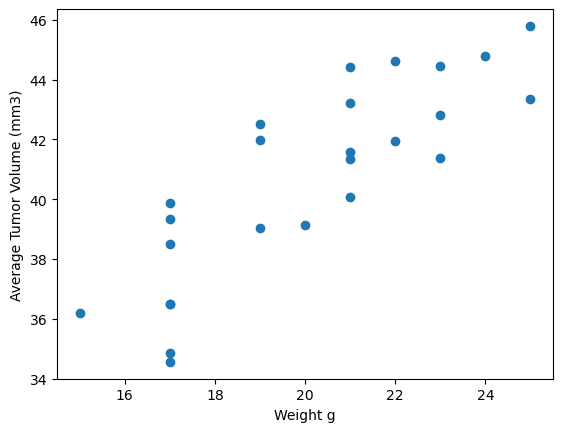

In [241]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#y-avg tumor volume (lat)
#x-weight (long)


avgs = data_cap.groupby(["Mouse ID"]).mean() #averages


plt.scatter(avgs["Weight (g)"],avgs["Tumor Volume (mm3)"])
plt.xlabel("Weight g")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weigth and the average tumor volume is 0.84


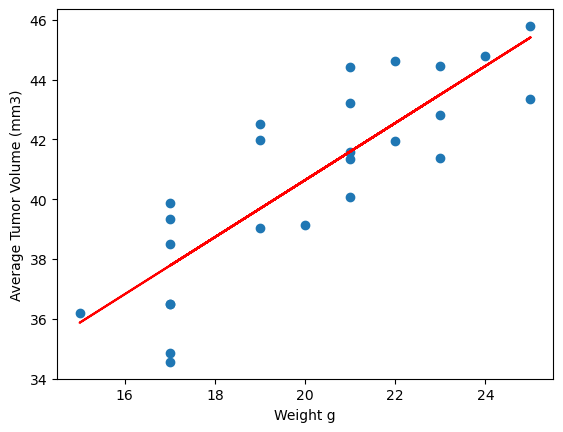

In [238]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(avgs["Weight (g)"], avgs["Tumor Volume (mm3)"])
regress_values = avgs["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avgs["Weight (g)"],avgs["Tumor Volume (mm3)"])
plt.plot(avgs["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight g")
plt.ylabel("Average Tumor Volume (mm3)")


poids= avgs["Weight (g)"]
avvol= avgs["Tumor Volume (mm3)"]
#print statement with correlation coefficient
print(f"The correlation between mouse weigth and the average tumor volume is {round(st.pearsonr(poids,avvol)[0],2)}")
plt.show() #show scatterplot